# Plots for Different Learning Rates Test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
"""
Takes a json file that is formated in the programs output form.
Returns the list of hyperparameters used to run the model and a dataframe of the recorded metrics.
"""
def json_to_dataframe(json_file):
    f = open(json_file)
    data = json.load(f)
    hyper_parameters = data.pop('Hyper Parameters')
    df = pd.DataFrame.from_dict(data)
    return hyper_parameters, df

"""
Takes an array of json files (generated from the model) and a specified column 
Returns a dataframe of the coulmns from the datasets.
"""
def merge_on_column(json_file_array, column):
    merged_df = pd.DataFrame()
    for json_file in json_file_array:
        hyper_paramters, df = json_to_dataframe(json_file)
        column_name = str(hyper_paramters[-2]) + ', ' + str(hyper_paramters[-1]) + ' ' + column # Coulumn Title
        merged_df[column_name] = df[column]
    return merged_df

def merge_on_metric(digits, metric):
    dfs = [None] * 16
    for j in range(0, 4):
        file_name = "data/" + "r" + digits + "(1)" * j + ".json"
        dfs[j] = file_name
    for i in range(0,12):
        file_name = "data/" + "s" + digits + "(1)" * i + ".json"
        dfs[i + 4] = file_name
    
    #for file_name in dfs:
        #dfs[file_name] = merge_on_column(file_name, metric)
    return merge_on_column(dfs, metric)

## Plotting Loss Over values of the same digits

In [3]:
loss_dfs = [None]*4
loss_dfs[0] = merge_on_metric('01', "Loss")
loss_dfs[1] = merge_on_metric('27', "Loss")
loss_dfs[2] = merge_on_metric('46', "Loss")
loss_dfs[3] = merge_on_metric('89', "Loss")

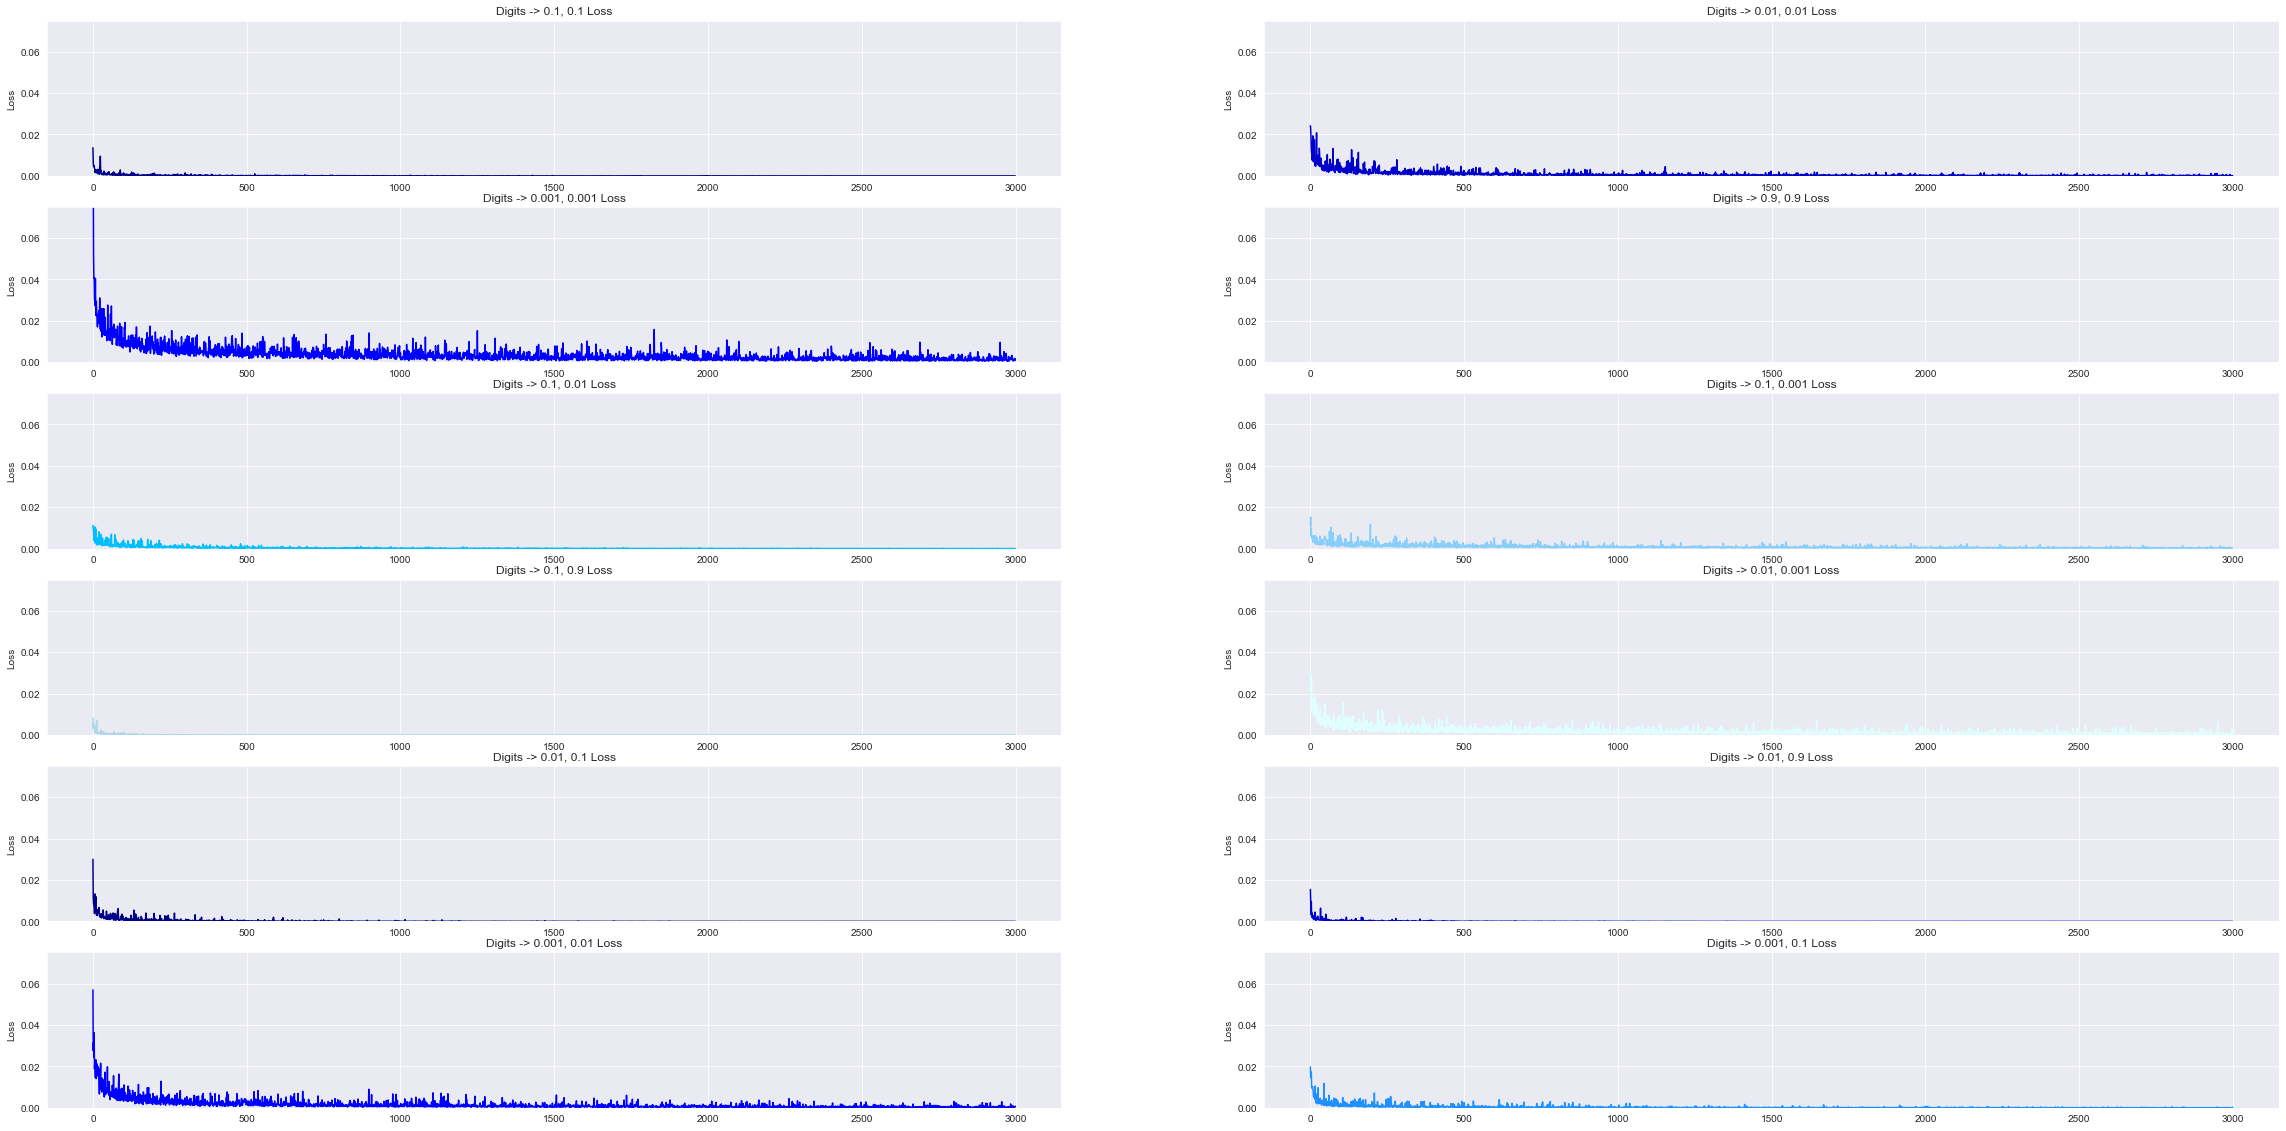

In [45]:
fig, axes = plt.subplots(6, 2)
title = list(loss_dfs[0].iloc[:0])

colors = ['darkblue', 'mediumblue', 'blue', 'dodgerblue', 'deepskyblue', 'lightskyblue', 'lightblue', 'lightcyan','darkblue', 'mediumblue', 'blue', 'dodgerblue', 'deepskyblue', 'lightskyblue', 'lightblue', 'lightcyan']

for i, ax in enumerate(axes.ravel()):
    ax.set_title(f"Digits -> {title[i]}")
    ax.set_ylim([0, 0.075])
    ax.set_ylabel('Loss')
    loss_dfs[0].iloc[:, i].plot(ax=ax, color=colors[i])

In [4]:
plt.rcParams["figure.figsize"] = (40,20)

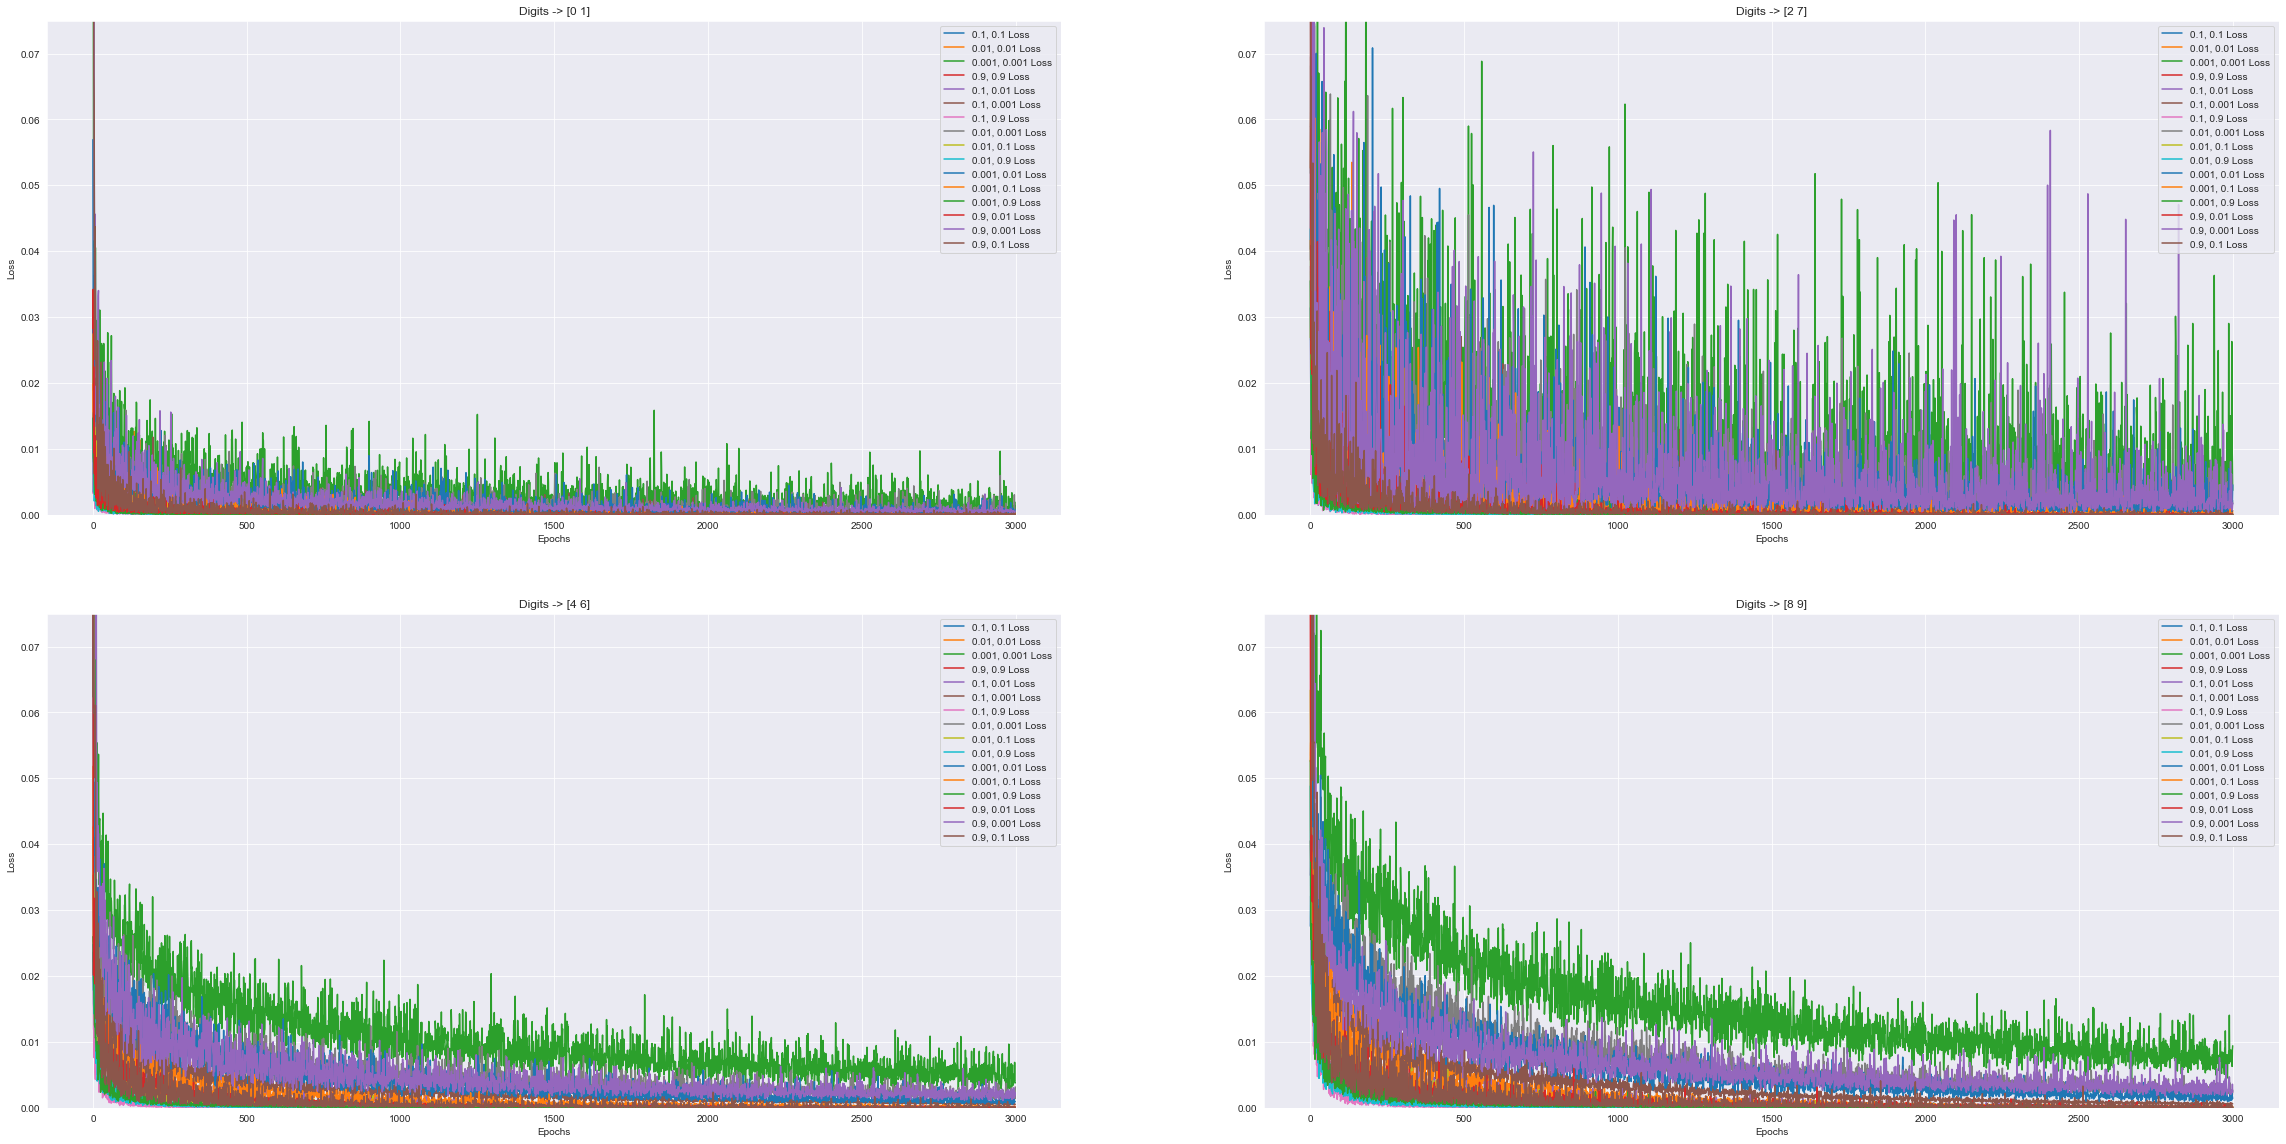

In [5]:
nrow = 2
ncol = 2
fig, axes = plt.subplots(2, 2)
title = ["[0 1]",  "[2 7]", "[4 6]", "[8 9]"]

for i, ax in enumerate(axes.ravel()):
    ax.set_title(f"Digits -> {title[i]}")
    ax.set_ylim([0, 0.075])
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epochs')
    loss_dfs[i].plot(ax=ax)



## Plotting Accuracy over all

In [6]:
val_dfs = [None]*4
val_dfs[0] = merge_on_metric('01', "Validation Accuracy")
val_dfs[1] = merge_on_metric('27', "Validation Accuracy")
val_dfs[2] = merge_on_metric('46', "Validation Accuracy")
val_dfs[3] = merge_on_metric('89', "Validation Accuracy")

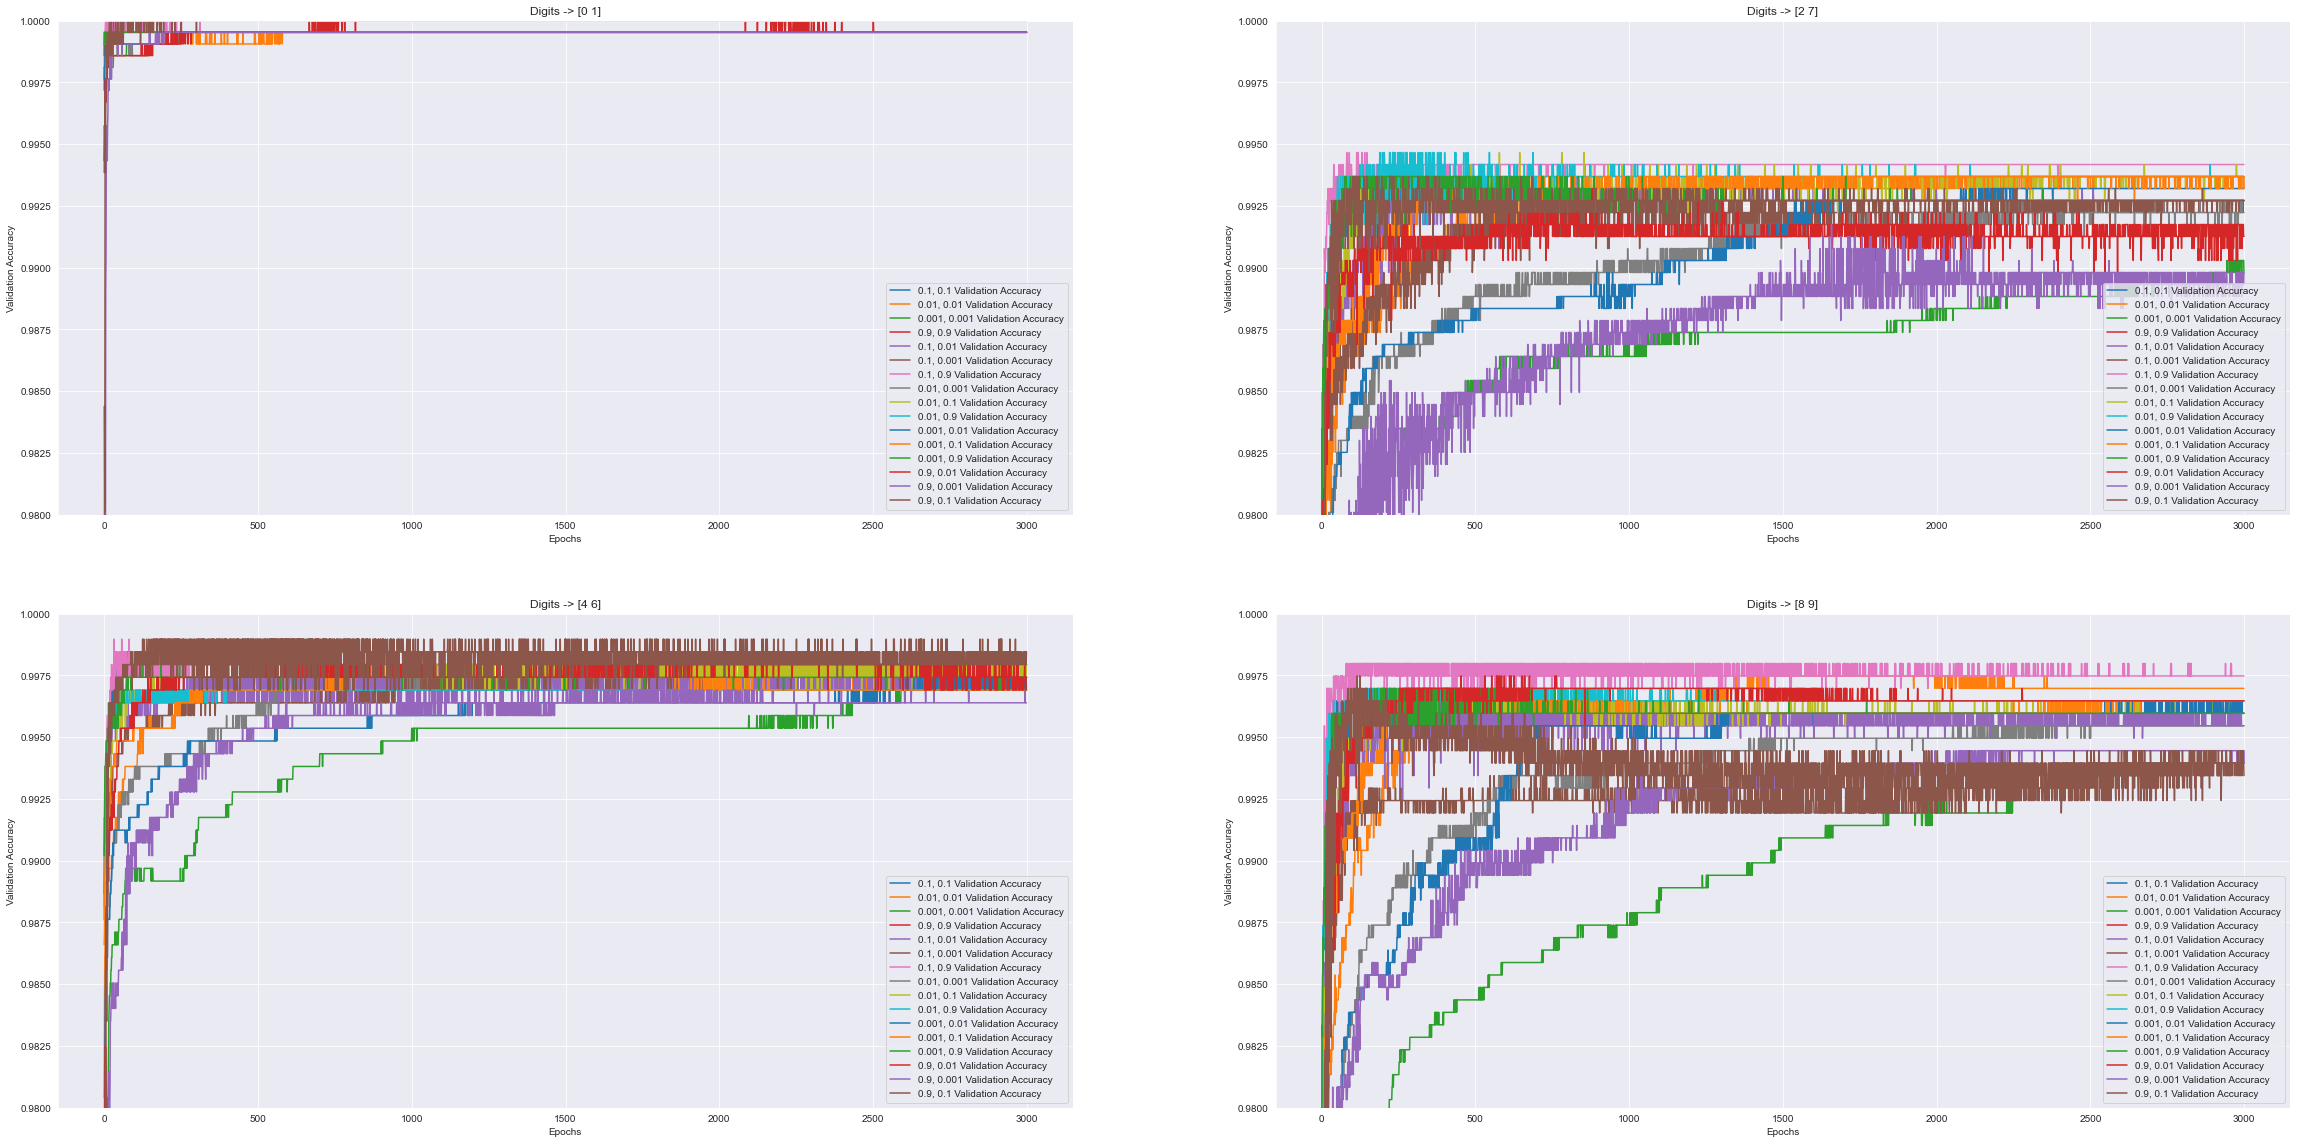

In [7]:
nrow = 2
ncol = 2
fig, axes = plt.subplots(2, 2)
title = ["[0 1]",  "[2 7]", "[4 6]", "[8 9]"]

for i, ax in enumerate(axes.ravel()):
    ax.set_title(f"Digits -> {title[i]}")
    ax.set_ylabel('Validation Accuracy')
    ax.set_xlabel('Epochs')
    ax.set_ylim([0.98, 1])
    val_dfs[i].plot(ax=ax)

## Plotting CKA over all

In [8]:
cka_dfs = [None]*4
cka_dfs[0] = merge_on_metric('01', "Centered Kernel Alignment")
cka_dfs[1] = merge_on_metric('27', "Centered Kernel Alignment")
cka_dfs[2] = merge_on_metric('46', "Centered Kernel Alignment")
cka_dfs[3] = merge_on_metric('89', "Centered Kernel Alignment")

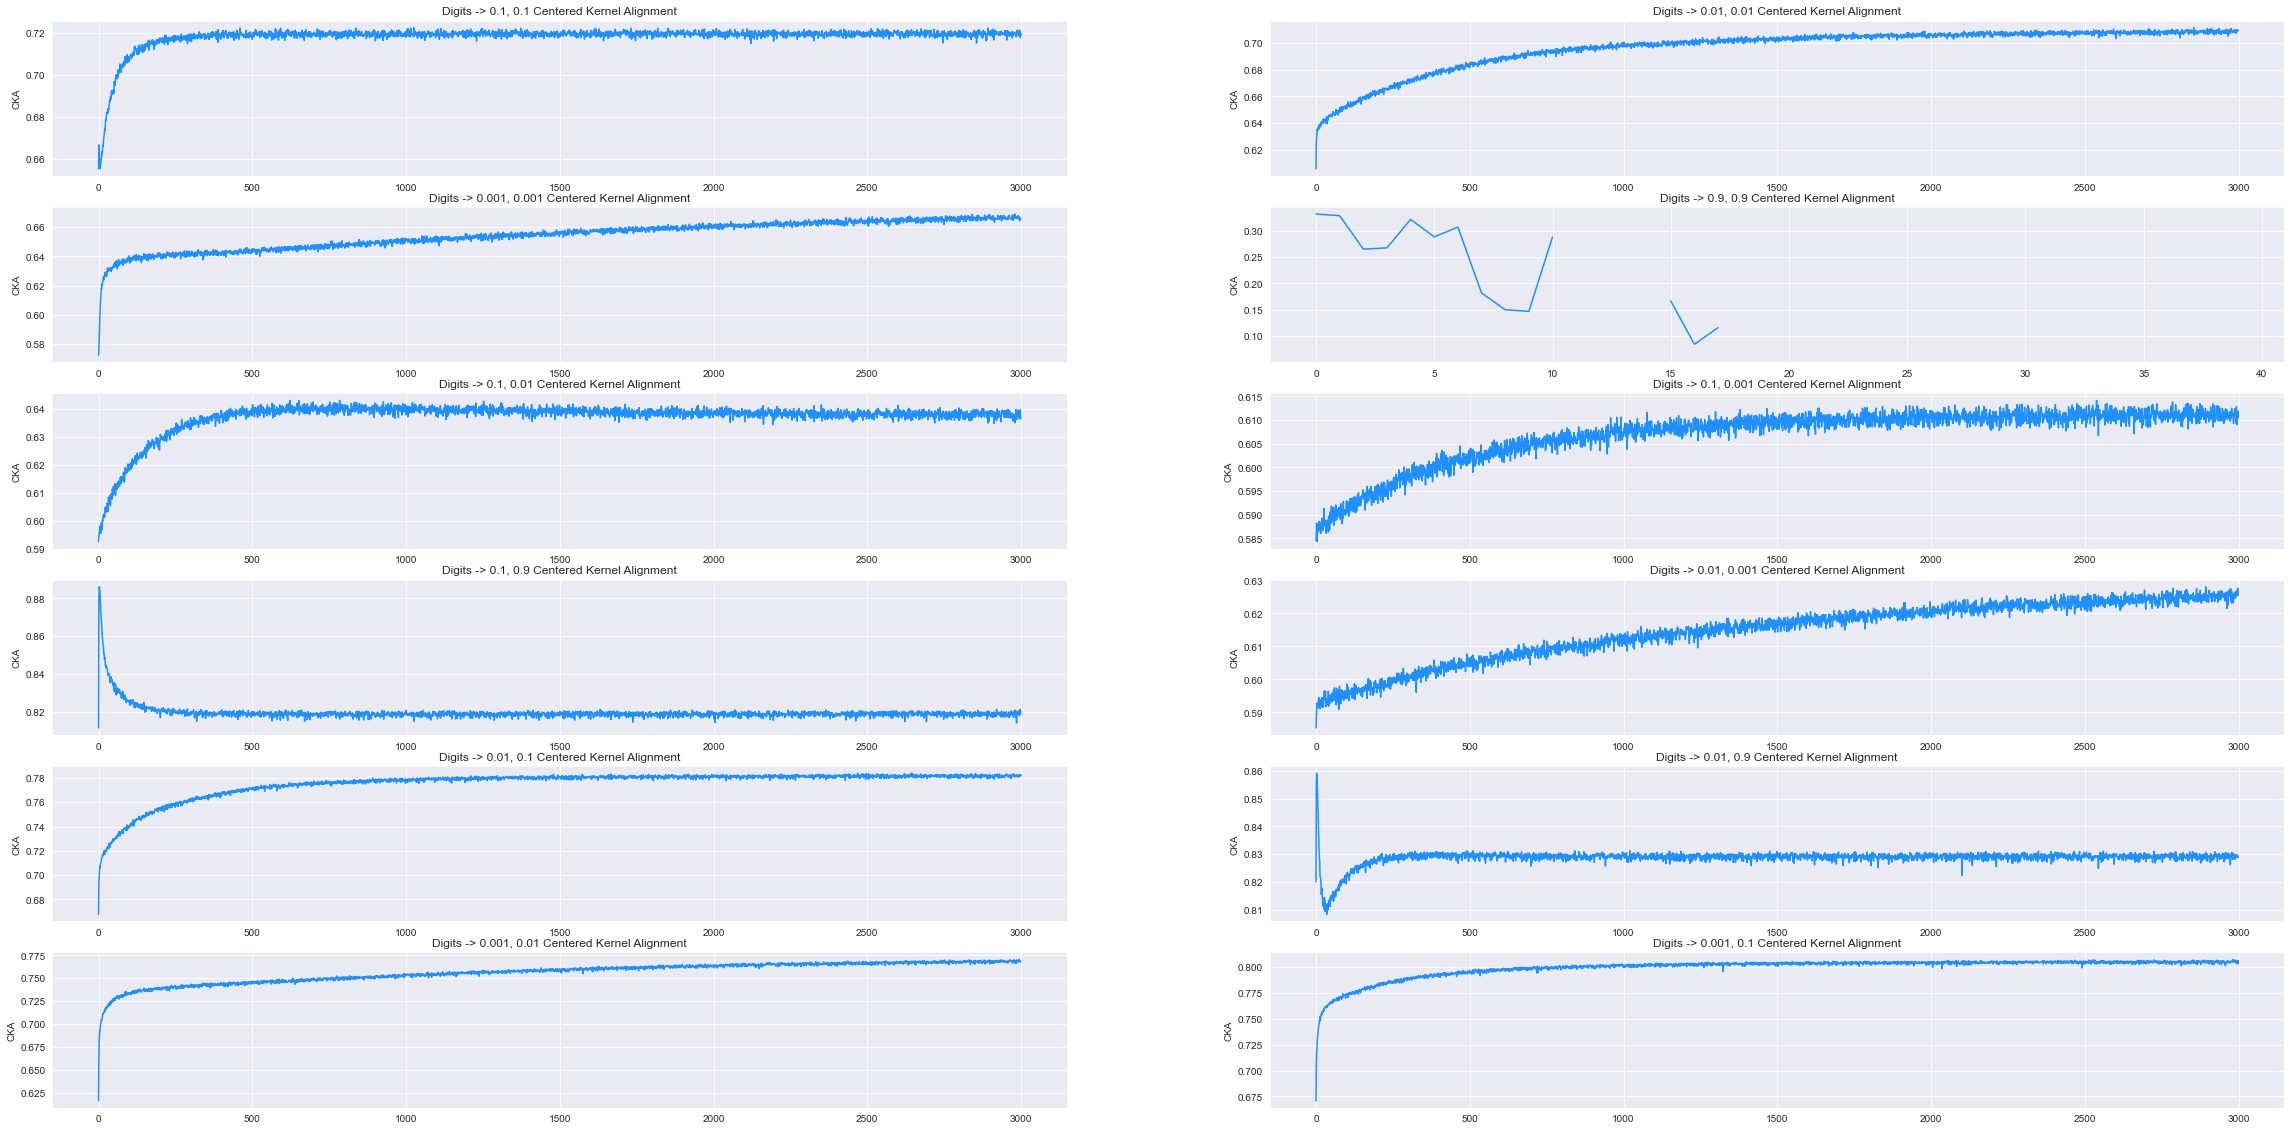

In [48]:
fig, axes = plt.subplots(6, 2)
title = list(cka_dfs[0].iloc[:0])
colors = ['red', 'yellow', 'green', 'cyan', 'magenta', 'black',
          'blue', 'orange', 'pink', 'purple', 'brown', 'lavender',
          'gray', 'lime', 'aquamarine', 'turquoise']

for i, ax in enumerate(axes.ravel()):
    ax.set_title(f"Digits -> {title[i]}")
    ax.set_ylabel('CKA')
    cka_dfs[1].iloc[:, i].plot(ax=ax, color = 'dodgerblue')

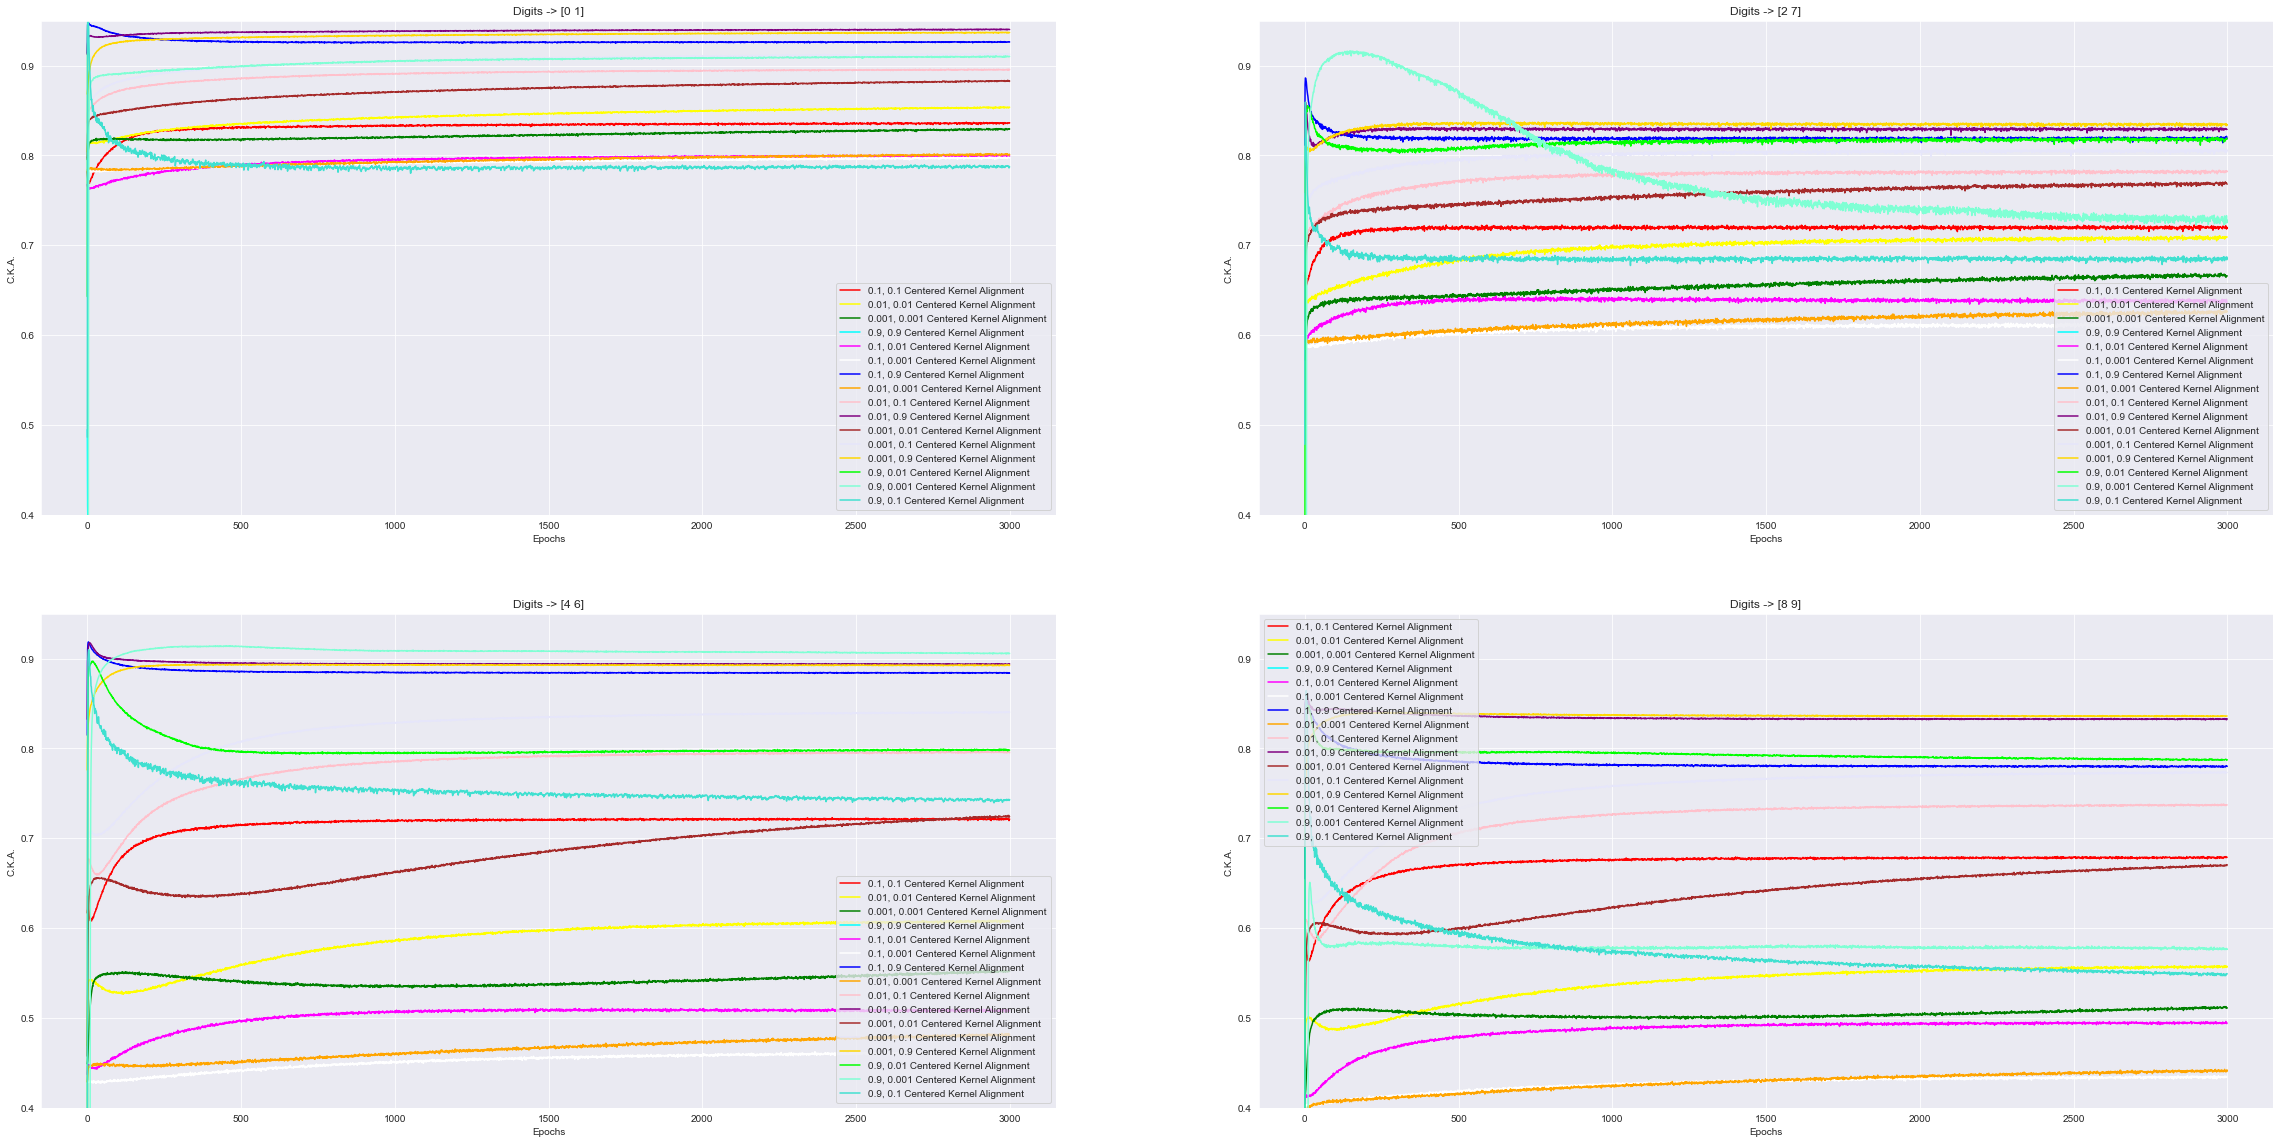

In [46]:
nrow = 2
ncol = 2
fig, axes = plt.subplots(2, 2)
title = ["[0 1]",  "[2 7]", "[4 6]", "[8 9]"]
colors = ['red', 'yellow', 'green', 'cyan', 'magenta', 'white',
          'blue', 'orange', 'pink', 'purple', 'brown', 'lavender',
          'gold', 'lime', 'aquamarine', 'turquoise']
for i, ax in enumerate(axes.ravel()):
    ax.set_title(f"Digits -> {title[i]}")
    ax.set_ylabel('C.K.A.')
    ax.set_xlabel('Epochs')
    ax.set_ylim([0.4, 0.95])
    cka_dfs[i].plot(ax=ax, color = colors)

## Bar plot for accuracy

<AxesSubplot:>

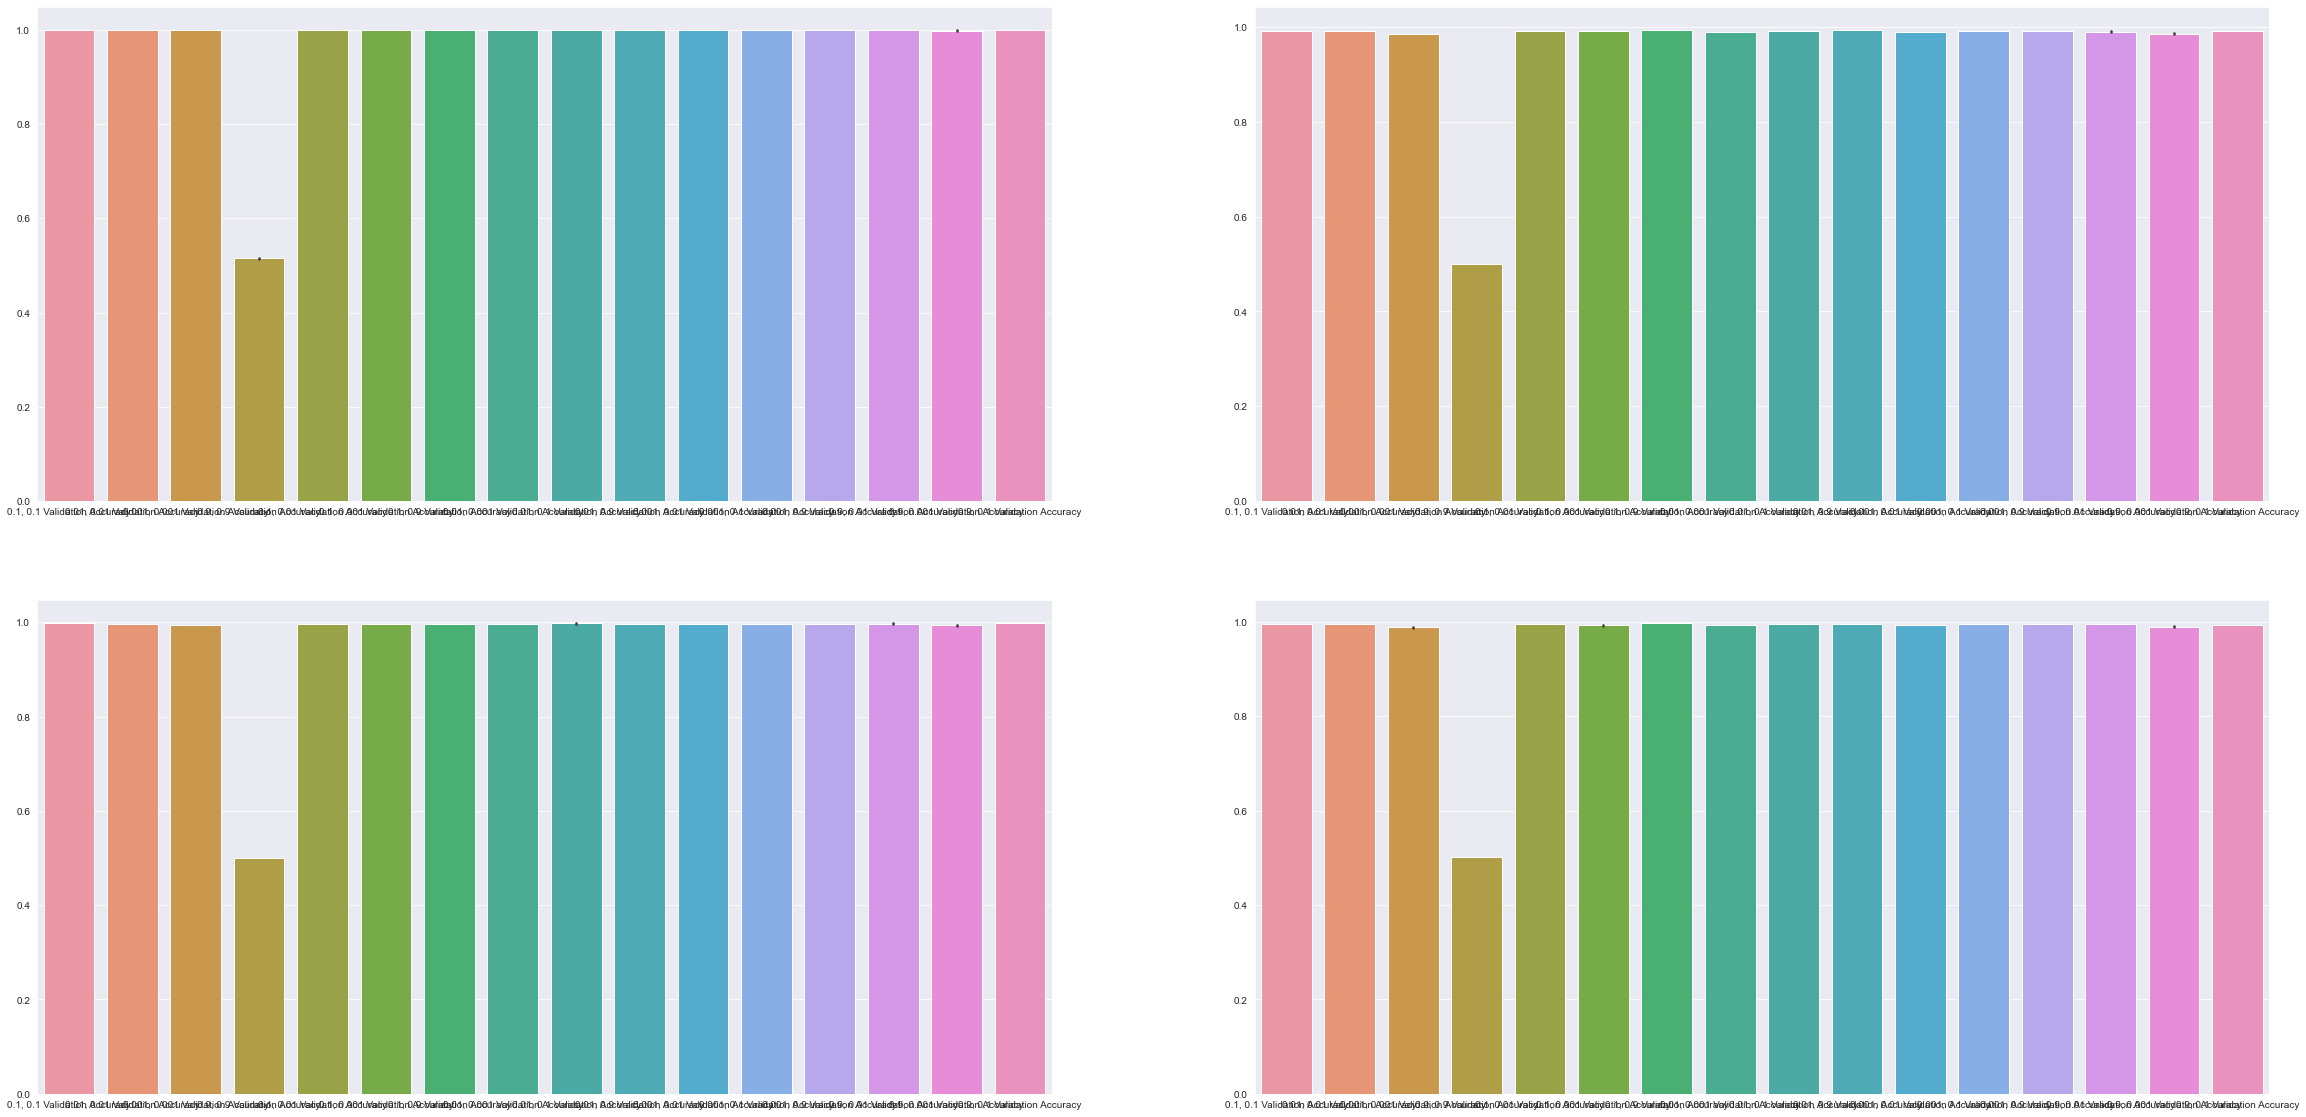

In [10]:
nrow = 2
ncol = 2
fig, axes = plt.subplots(2, 2)
title = ["[0 1]",  "[2 7]", "[4 6]", "[8 9]"]

sns.barplot(data=val_dfs[0], ax=axes[0,0])
sns.barplot(data=val_dfs[1], ax=axes[0,1])
sns.barplot(data=val_dfs[2], ax=axes[1,0])
sns.barplot(data=val_dfs[3], ax=axes[1,1])
#for i, ax in enumerate(axes.ravel()):
#    ax.set_title(f"Digits -> {title[i]}")
#    ax.set_ylabel('CKA')
#    ax.set_xlabel('Learning Rates')
#    ax.set_ylim([0.4, 1])
#    cka_dfs[i].iloc[-1].plot.bar(ax=ax)